In [1]:
import seaborn as sns

In [2]:
#데이터셋 로딩

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [3]:
tips["day"].unique

<bound method Series.unique of 0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']>

In [4]:
from sklearn.preprocessing import LabelEncoder

In [9]:
items = tips["day"]

encoder = LabelEncoder()
#encoder.fit(items)
#lables = encoder.transform(items)
lables = encoder.fit_transform(items)
lables

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [6]:
encoder.classes_

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [8]:
encoder.inverse_transform([2])

array(['Sun'], dtype=object)

In [11]:
lables.shape

(244,)

In [12]:
lables = lables.reshape(-1,1)
lables.shape

(244, 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
one_hot_encoder = OneHotEncoder()
one_hot_encoding_result = one_hot_encoder.fit_transform(lables)
one_hot_encoding_result

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 244 stored elements and shape (244, 4)>

In [16]:
one_hot_encoding_result.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


## 표준화 실습(Scaling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
df_bike = pd.read_csv("train.csv")
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#스케일링 데이터만 추출 (temp, atemp, humidity, windspeed)
#df_bike_num = df_bike.iloc[:, 5:9]
#df_bike_num = df_bike.loc[:, "temp":"windspeed"]
cols = ["temp", "atemp", "humidity", "windspeed"]
df_bike_num = df_bike.loc[:, cols]
df_bike_num.head()

,temp,atemp,humidity,windspeed
0,9.84,14.395,81,0.0
1,9.02,13.635,80,0.0
2,9.02,13.635,80,0.0
3,9.84,14.395,75,0.0
4,9.84,14.395,75,0.0


In [5]:
scaler = StandardScaler()
scaling_result = scaler.fit_transform(df_bike_num)
scaling_result

array([[-1.33366069, -1.09273697,  0.99321305, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       ...,
       [-0.80742813, -0.91395927, -0.04606385,  0.26970368],
       [-0.80742813, -0.73518157, -0.04606385, -0.83244247],
       [-0.91267464, -0.82486544,  0.21375537, -0.46560752]],
      shape=(10886, 4))

In [7]:
scaled_bike = pd.DataFrame(data=scaling_result, columns=df_bike_num.columns)
scaled_bike

,temp,atemp,humidity,windspeed
0,-1.333661,-1.092737,0.993213,-1.567754
1,-1.438907,-1.182421,0.941249,-1.567754
2,-1.438907,-1.182421,0.941249,-1.567754
3,-1.333661,-1.092737,0.681430,-1.567754
4,-1.333661,-1.092737,0.681430,-1.567754
...,...,...,...,...
10881,-0.596935,-0.467310,-0.617666,1.617227
10882,-0.702182,-0.735182,-0.253919,0.269704
10883,-0.807428,-0.913959,-0.046064,0.269704
10884,-0.807428,-0.735182,-0.046064,-0.832442


In [8]:
scaled_bike.mean(), scaled_bike.std(), scaled_bike.var()

(temp         3.133020e-16
 atemp       -2.193114e-16
 humidity     1.148774e-16
 windspeed   -5.221699e-17
 dtype: float64,
 temp         1.000046
 atemp        1.000046
 humidity     1.000046
 windspeed    1.000046
 dtype: float64,
 temp         1.000092
 atemp        1.000092
 humidity     1.000092
 windspeed    1.000092
 dtype: float64)

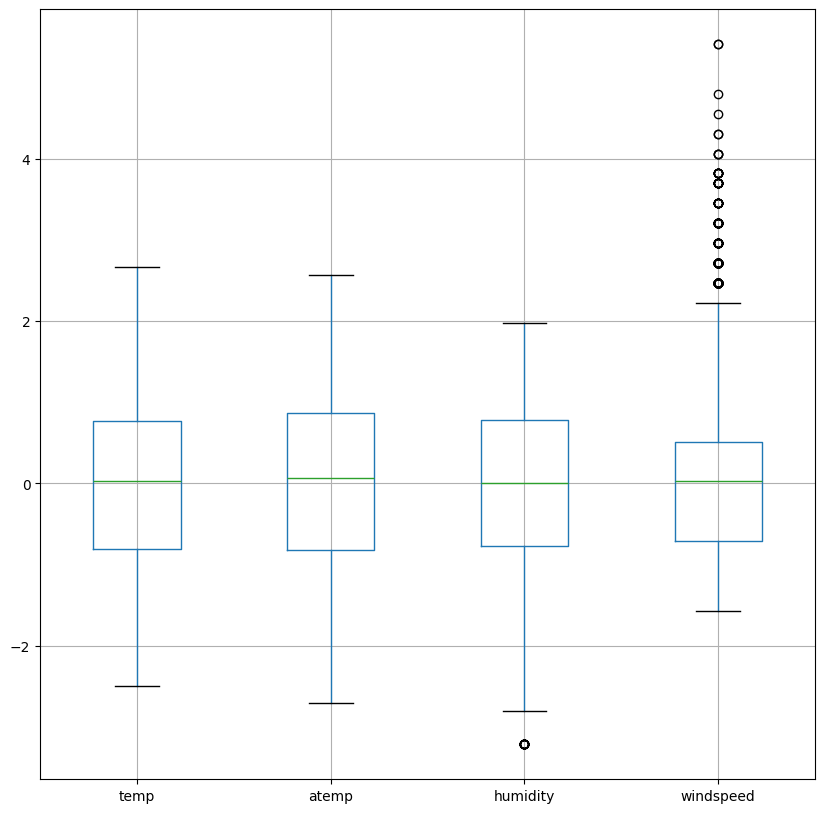

In [10]:
plt.figure(figsize=(10, 10))
scaled_bike.boxplot(column=list(scaled_bike.columns))
plt.show()

## 데이터 전처리
 - 데이터 품질을 향상시키기 위한 절차
 - 데이터 품질을 낮추는 주요 요인?
   -> noise(결측값 --> (불완전(incomplete), 라이브러리가 running x), 이상값 --> "경향성"을 훼손시킴)
   -> Inconsistency(모순) : 데이터 사이에서 정합성이 결여된 상황

 - 데이터 전처리 주요기법
   -> 변환(Transformation) : Scaling, normalization, 모양변환(Pivot, Unpivot), 파생변수(주 구매매장, 구매다양성), 요약변수(집계, 매장이용횟수)
      (*시험x : 데이터 분포의 변환 : 정규분포를 가정하는 분석기법을 사용할 때, 입력 데이터가 정규성을 위반하는 경우
                : 왜도
                 - Positive skew --> squre root(x1변수) --> log10(x1변수) --> 1/(x1변수)
                 - Negative skew --> squre root(x1변수 +1) --> log10(max(x1+1)-x1) --> 1/(max(x1+1)-x1))
                : 정규성, 등분산성도 위반되는 경우
                 - Box-Cox 변환
                 - 람다 : 3, 2, 1, 1/2, 0, -1, -1/2, -1/3 
   -> 정제(Cleansing) : Noise 처리(제거, 대체) 
   -> 이상값 탐지(Boxplot, ESD, LOF(Local Outlier Factor), Model(KNN, Clustering)) --> 이상값 대체(윈저화, 구간화(Binning or Bucketization))
      LOF < 1 : 밀도가 높은 분포
      LOF =(유사) 1 : 이웃 분포들이 유사한 밀도를 가지는 분포
      LOF > 1 : 밀도가 작은 분포 ==> 이상치 정도가 큰 친구들
   -> 축소(Reduction) : 변수의 개수를 줄여준다. --> PCA(유사한 변수들은 특징을 합쳐서 하나의 변수로 만드는 기법)
   -> 통합(Intergration) : Merge, Join